Date: 03Nov2022    
Author: Lynn Menchaca

Resources: 
- Spaceship Titanic Kaggle data set
- Density plot of several variable
    - (https://www.python-graph-gallery.com/74-density-plot-of-several-variables)
- Feature Transformation and scaling Techniques to Boost Your Model Performation -> By Purva Huilgol
    - (https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/)
- Explained: Transformation & Scaling -> By Manu Sharma
    - https://towardsdatascience.com/transformation-scaling-of-numeric-features-intuition-7f4436e8e074#:~:text=If%20dependent%20features%20are%20transformed,should%20be%20applied%20after%20transformation.

This is my 2nd attempt working with the Spaceship Titanic data set. The purpose of this document is to practice new exploratory data analysis methods along with new feature engineering methods. With these new methods see if I can improve my accuracy with the test data set and my overall score with Kaggle.

### Initial Overview

### EDA
- Make copy of train data to play with
- Initial Overview: size, collumns, data types, missing values
- Initial Explore/Format Data: strings, temporal varialbes, impossible numbers
- Statistics/Explore Data: Distribution of numeric variables, categorical data
- Ansers to questions with plots

### Feature Engineering
- Combine Test and Train Data
- Missing Data -> By end of this step all rows are filled in
- Format Data: strings, temporal varialbes -> 
    By end of this step all columns are ready for final processing and cleaning
- Treating Outliers
- Scaling/Transformation
- Encoding methods
- Handel Imbalance Data set
- Split Test and Train Data -> Export both to csv file for Feature Selection Process




In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stat
import pylab
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler

In [2]:
#reading in the Spaceship Titanic data set

data_file_path = '/Users/lynnpowell/Documents/DS_Projects/Spaceship_Titanic/'
df_train = pd.read_csv(data_file_path+'train.csv')
df_test = pd.read_csv(data_file_path+'test.csv')
#df_train.head()

#Make a copy of train data set to play with
df = df_train.copy()
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
#Overview of data
print(df_train.shape)
print(df_test.shape)
print('\n')
print(df.info())

(8693, 14)
(4277, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [4]:
print(df['HomePlanet'].isnull().mean())
print(df['HomePlanet'].isnull().sum()/8693)

0.023122052225928908
0.023122052225928908


In [5]:
# Number of missing values
print(df.isnull().sum())
print('\n')

#Percentage of missing values
feat_nan_list = [feat for feat in df.columns if df[feat].isnull().sum() > 1]

for feat in feat_nan_list:
    missing_perc = df[feat].isnull().mean()*100
    print(feat + ' missing percent: ' + str(round(missing_perc,2)) + '%')

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


HomePlanet missing percent: 2.31%
CryoSleep missing percent: 2.5%
Cabin missing percent: 2.29%
Destination missing percent: 2.09%
Age missing percent: 2.06%
VIP missing percent: 2.34%
RoomService missing percent: 2.08%
FoodCourt missing percent: 2.11%
ShoppingMall missing percent: 2.39%
Spa missing percent: 2.11%
VRDeck missing percent: 2.16%
Name missing percent: 2.3%


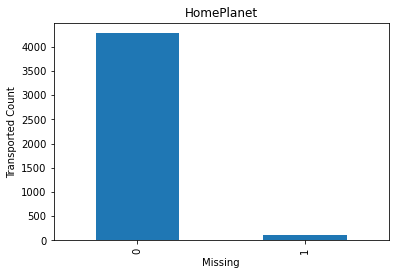

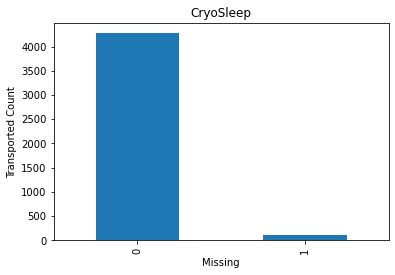

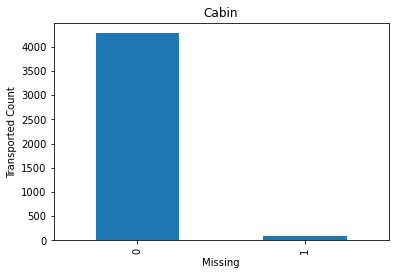

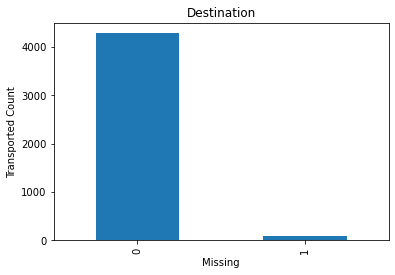

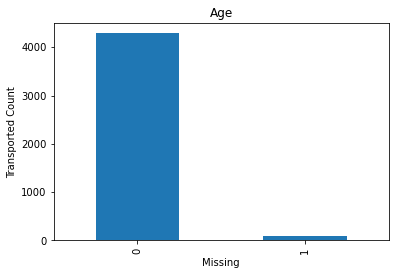

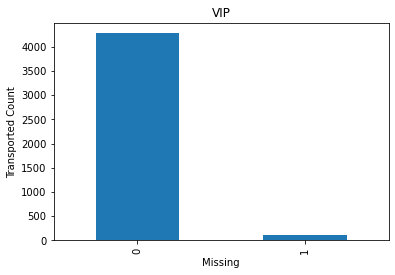

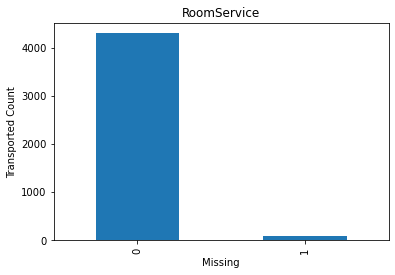

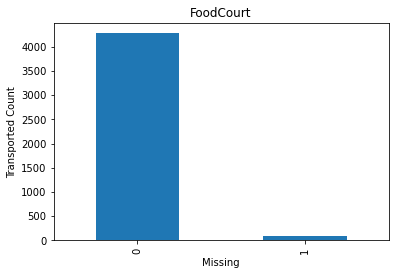

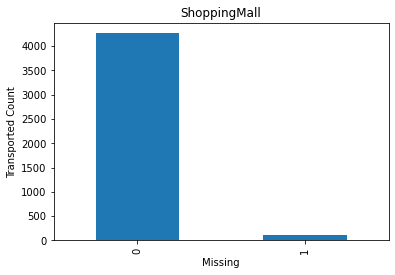

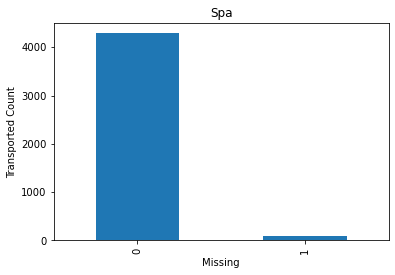

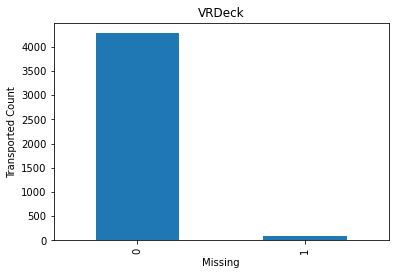

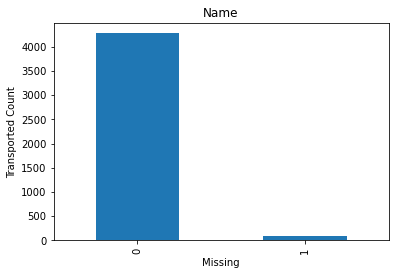

In [6]:
#Thinking about removing this cell not learning anything from it

#Looking for relation between missing values and Transported

for feat in feat_nan_list:
    data = df.copy()
    data[feat] = np.where(data[feat].isnull(), 1, 0)
    data.groupby(feat)['Transported'].sum().plot.bar()
    plt.xlabel('Missing')
    plt.ylabel('Transported Count')
    plt.title(feat)
    plt.show()

In [7]:
# Exploring String data

#Columns: HomePlanet, Cabin, Destination, Name, PassengerId

df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

categorical data (3 categories), no pre-cleaning required

In [8]:
#cabin -> deck/ number/ side
#Side (P for port or S for Starboard)
df['Ship_Deck'] = df.Cabin.str.split('/').str.get(0)
df['Cabin_Num'] = pd.to_numeric(df.Cabin.str.split('/').str.get(1))
df['Ship_Side'] = df.Cabin.str.split('/').str.get(2)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Ship_Deck,Cabin_Num,Ship_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [9]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

categorical data (3 categories), no pre-cleaning required

In [10]:
# Cleaning String data
#Looking for titles, prefixes or suffixes in the name column

df['Name'].str.split().str.len().value_counts()

2.0    8493
Name: Name, dtype: int64

There does not appear to be any prefixes or suffixes in the name column

In [11]:
#PassengerId - group_number in group

df['ID_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(0))
df['Num_In_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(1))
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Ship_Deck,Cabin_Num,Ship_Side,ID_Group,Num_In_Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,4,1


In [12]:
print(df.shape)
print('\n')
print(df.info())

(8693, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Ship_Deck     8494 non-null   object 
 15  Cabin_Num     8494 non-null   float64
 16  Ship_Side     8494 non-null   object 
 17  ID_Group      8693 non-null   int64  
 18  Num_In_Group  8

In [13]:
#Distribution of numeric values

#creating a list of numerical features
num_feat_lst = [feat for feat in df.columns if (df[feat].dtype != 'O' and df[feat].dtype != 'bool')]
print(num_feat_lst)
print('Number of numeric features: ' + str(len(num_feat_lst)))
print('\n')

# Looking for discrete numeric features
discrete_feat_lst = [feat for feat in num_feat_lst if (len(df[feat].unique()) < 10)]
print(discrete_feat_lst)
print('Number of discrete features: ' + str(len(discrete_feat_lst)))
print('\n')

# Looking for continuous numeric features
contin_feat_lst = [feat for feat in num_feat_lst if (len(df[feat].unique()) > 10)]
print(contin_feat_lst)
print('Number of continuous features: ' + str(len(contin_feat_lst)))

df[num_feat_lst].head()

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'ID_Group', 'Num_In_Group']
Number of numeric features: 9


['Num_In_Group']
Number of discrete features: 1


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'ID_Group']
Number of continuous features: 8


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Num,ID_Group,Num_In_Group
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,2,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,3,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,3,2
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,4,1


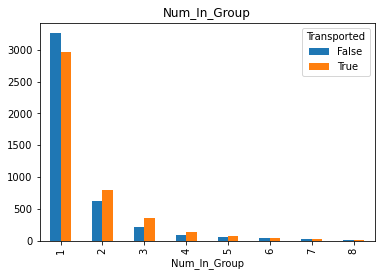

In [14]:
#Plotting Discrete Data - bar

for feat in discrete_feat_lst:
    df.groupby([feat,'Transported']).size().unstack('Transported').plot.bar()
    plt.title(feat)
    plt.show()

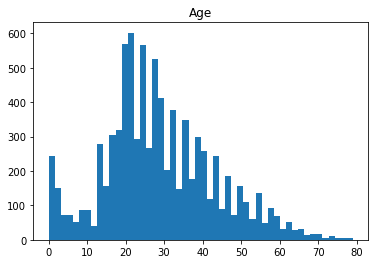

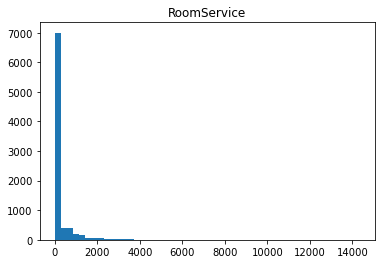

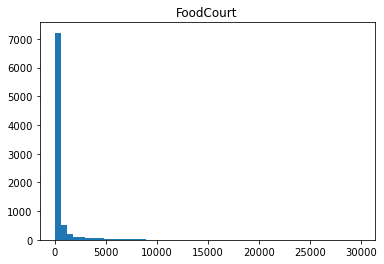

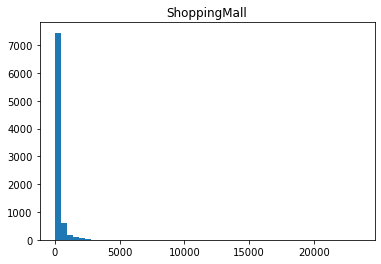

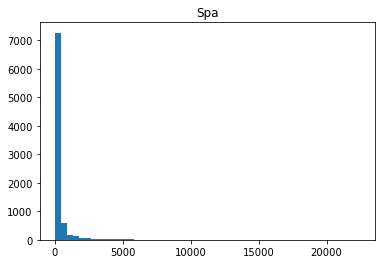

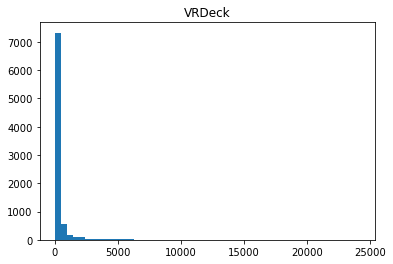

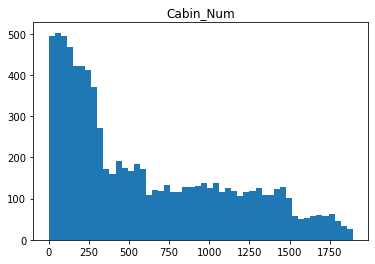

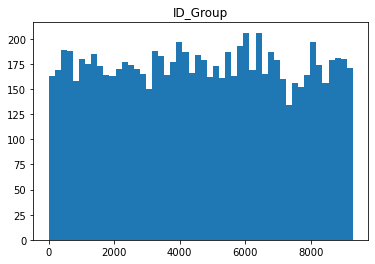

In [15]:
#Plotting Continuous Data - historgrams

for feat in contin_feat_lst:
    #contin_data = df.groupby([feat,'Transported']).size().unstack('Transported').plot.bar()
    plt.hist(df[feat], density=False, bins=50)
    plt.title(feat)
    plt.show()

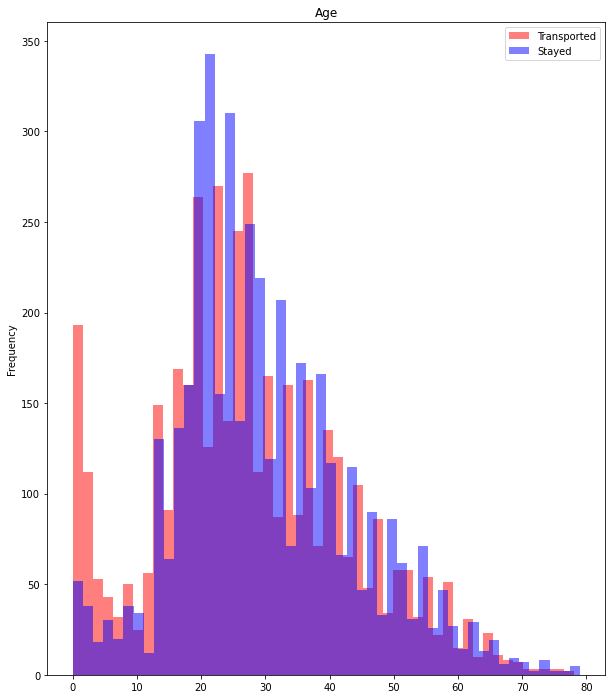

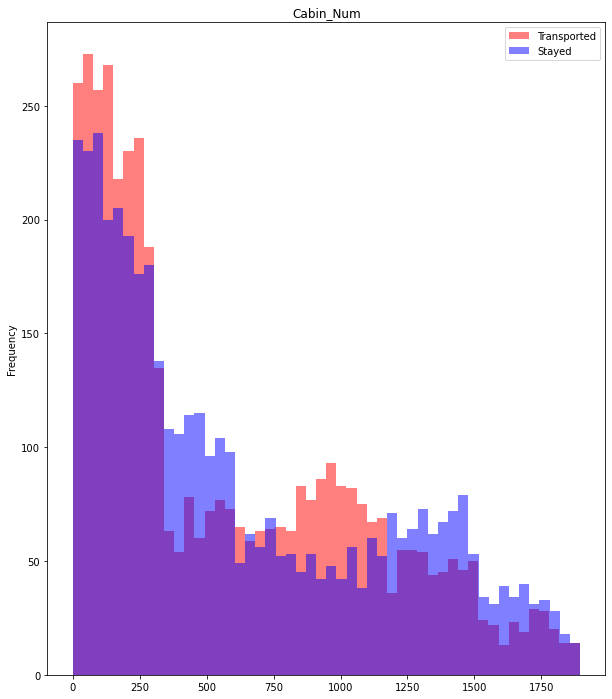

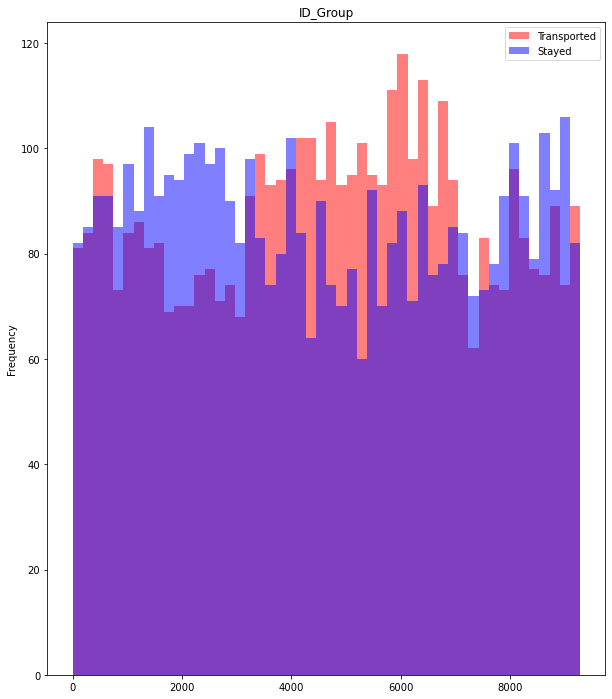

In [16]:
#Plotting just the age, Cabin_Num, ID_Group
num_data = ['Age','Cabin_Num','ID_Group']

#Historam of age with transported and stayed
for feat in num_data:
    plt.figure(figsize=(10,12))
    transported = df[df["Transported"] == True]
    stayed = df[df["Transported"] == False]
    transported[feat].plot.hist(alpha=0.5,color='red',bins=50)
    stayed[feat].plot.hist(alpha=0.5,color='blue',bins=50)
    plt.title(feat)
    plt.legend(['Transported','Stayed'])
    plt.show()


Children with ages younger than 20 were more likely to be transported.

I looks like the cabin low cabin numbers have higher transported passenger count and the higher cabin numbers have a high stayed passenger count.

No conclusions drawn from ID_Group column.

In [17]:
#Plotting just the spending

#List of spending features
money_feat = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#creating a column with total value spend
df['Total_Spent'] = df[money_feat].sum(axis=1)
money_feat += ['Total_Spent']

df[money_feat].head(10)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spent
0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0,736.0
2,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,303.0,70.0,151.0,565.0,2.0,1091.0
5,0.0,483.0,0.0,291.0,0.0,774.0
6,42.0,1539.0,3.0,0.0,0.0,1584.0
7,0.0,0.0,0.0,0.0,NaN,0.0
8,0.0,785.0,17.0,216.0,0.0,1018.0
9,0.0,0.0,0.0,0.0,0.0,0.0


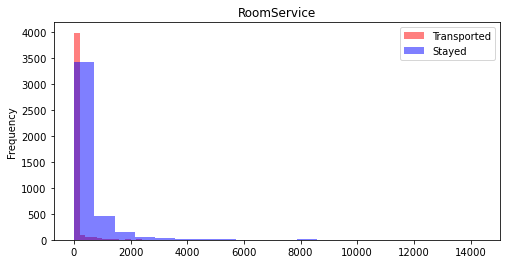

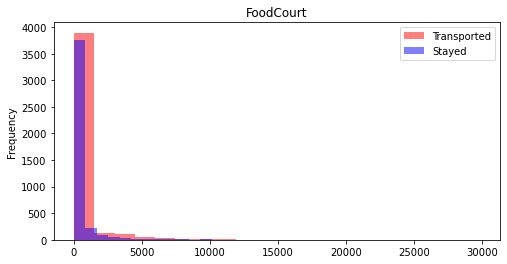

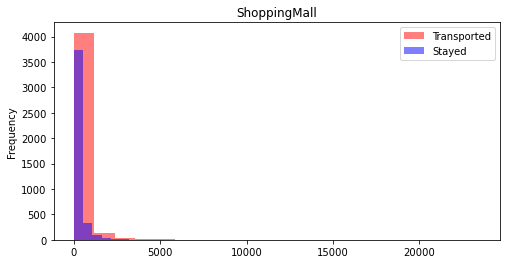

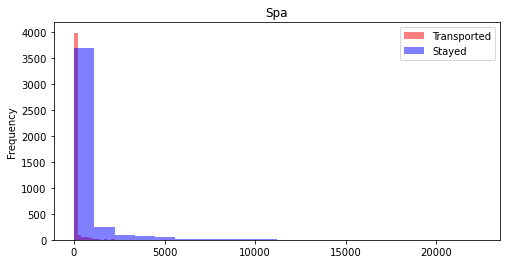

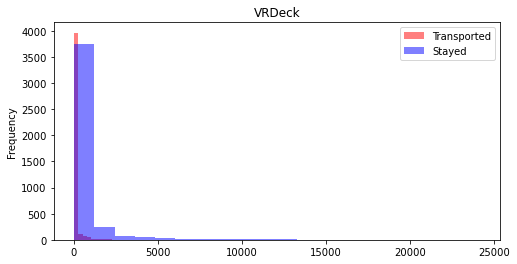

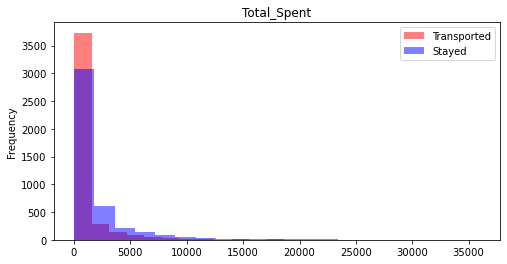

In [18]:
#data frame with awake passengers (CryoSleep = False) to the $0 spent is not misleading

df_awake = df[df['CryoSleep'] == False]

for feat in money_feat:
    plt.figure(figsize=(8,4))
    transported = df[df["Transported"] == True]
    stayed = df[df["Transported"] == False]
    transported[feat].plot.hist(alpha=0.5,color='red',bins=20)
    stayed[feat].plot.hist(alpha=0.5,color='blue',bins=20)
    plt.title(feat)
    plt.legend(['Transported','Stayed'])
    plt.show()
    

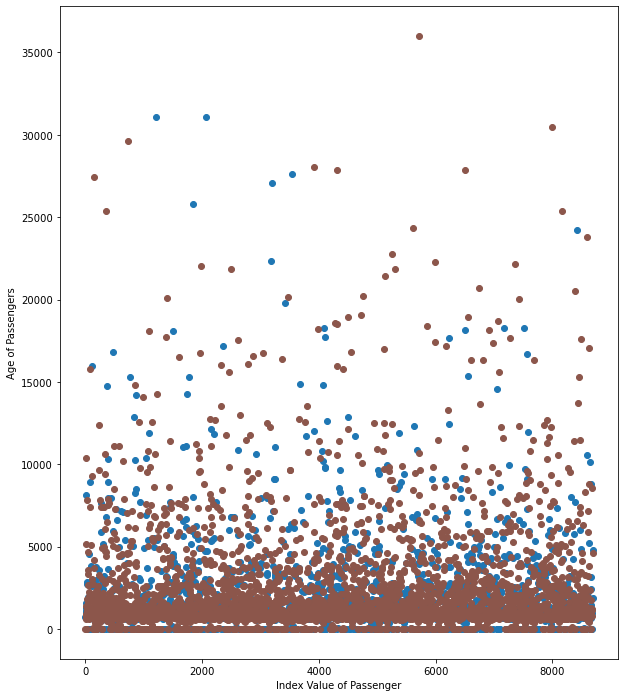

In [19]:
#Playing with different ways to analyze money spent while on board the ship

plt.figure(figsize=(10,12))
transported = df_awake[df_awake["Transported"] == True]
stayed = df_awake[df_awake["Transported"] == False]
plt.scatter(list(transported.index.values), transported['Total_Spent'], c='#1f77b4')
plt.scatter(list(stayed.index.values), stayed['Total_Spent'], c='#8c564b')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Age of Passengers')
plt.show()

In [20]:
#Analyze Categorical Data
#No boolean data to analyze outside of Transported column
cat_feat = [feat for feat in df.columns if df[feat].dtype == 'O']
cat_feat.remove('PassengerId')
cat_feat.remove('Name')
cat_feat.remove('Cabin')
print(cat_feat)
print('Number of Categorical Features: ' + str(len(cat_feat)))

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Ship_Deck', 'Ship_Side']
Number of Categorical Features: 6


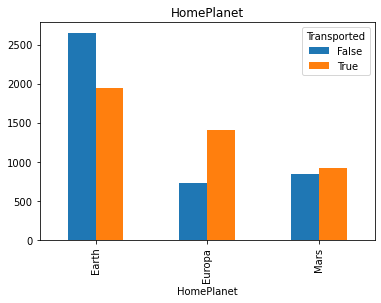

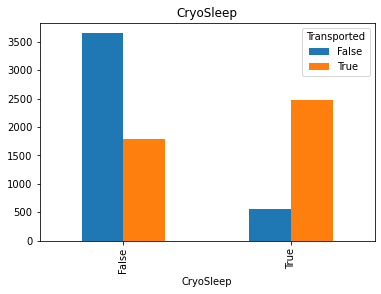

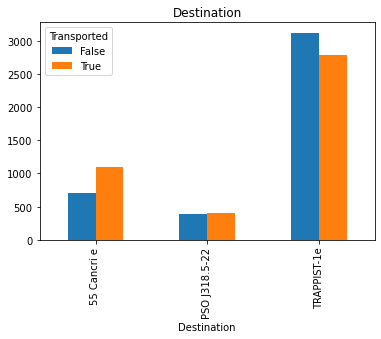

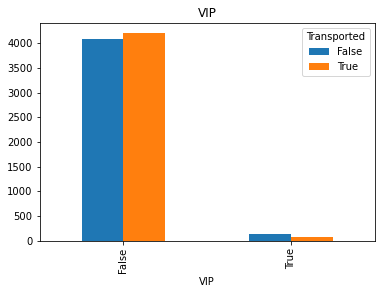

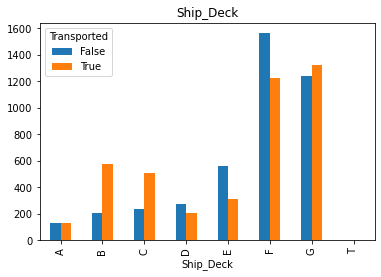

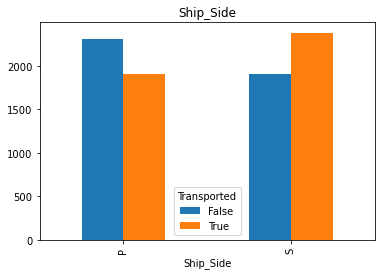

In [21]:
#bar ploting categorical data

for feat in cat_feat:
    df.groupby([feat, 'Transported']).size().unstack('Transported').plot.bar()
    plt.title(feat)
    plt.show()
    

HomePlant: Earth - higher Stay, Europa - higher transported, Mars - about even leaning towards transported

CryoSleep: Passengers in CryoSleep were significantly more likely to be transported than passengers awake

Destination: 55 Cancri e - higher Transported, Trappist-le - higher statyed, PSO J318.5-22 - about even leaning towards Transported

VIP: Not a very balanced feature, not very many people with VIP status. Passengers with VIP status was about even transported and stayed with a lean towards stayed

Ship Deck: High Stayed: Deck F, E -> High Transport: Deck B, C -> About even: Deck A, D, G and T

Ship Side: Starboard side has a higher percentage of transported passengers

### Feature Engineering
- Combine Test and Train Data
- Missing Data -> By end of this step all rows are filled in
- Format Data: strings, temporal varialbes -> 
    By end of this step all columns are ready for final processing and cleaning
- Treating Outliers
- Scaling/Transformation
- Encoding methods
- Handel Imbalance Data set
- Split Test and Train Data -> Export both to csv file for Feature Selection Process

In [22]:
#combining the train and test data
#df = df_train.append(df_test, ignore_index=True)
df = pd.concat([df_train,df_test], ignore_index=True)
#df.head()
df.tail()

#splitting the data back in to train and test data frames
#df_test = df[df['Transported'].isnull()]
#df_train = df[~df['Transported'].isnull()]

#Final Step Exporting to new train and test CSV file
#df_test.to_csv(data_file_path+'EDA_FeatENGR_test.csv', index=False)
#df_train.to_csv(data_file_path+'EDA_FeatENGR_train.csv',index=False)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


In [23]:
#Overview of data
print(df.shape)
print('\n')
print(df.info())

(12970, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB
None


In [24]:
#Looking at all features with missing values
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [25]:
#Future improvement could be spliting out last name and filling missing values
#based on group. Evaluating last name and transportation.

#Dropping Name features becuase it is to similar to Passenger ID and has missing values
df.drop(['Name'],axis=1,inplace=True)

In [26]:
#Since Passenger ID nan count is 0 -> can split the Passenger ID data performed
df['ID_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(0))
df['Num_In_Group'] = pd.to_numeric(df.PassengerId.str.split('_').str.get(1))
df.drop(['PassengerId'],axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID_Group,Num_In_Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1


In [27]:
#Making the assumption if the passengers are in the same family then they have the same:
#Homeplanet, Cabin, Destination and VIP status
fill_features = ['HomePlanet', 'Cabin', 'Destination', 'VIP']

#cleaning each feature independently
for feat in fill_features:
    #list of all index rows with null values for single feature
    null_index = df.index[df[feat].isnull()].tolist()
    
    for df_index in null_index:
        #Finding the group each index row belongs to
        id_group = df['ID_Group'].iloc[df_index]
        
        #Checking if they are a solo traveling passengers
        if len(df[df['ID_Group']==id_group])>1:
            group_index = df.index[df['ID_Group']==id_group].tolist()
            group_index.remove(df_index)
            i = 0
            #Use while loop to go though each group member
            while i < len(group_index):
                if group_index[i] in null_index:
                    i += 1
                else:
                    break
            #making sure the value of i can fit in the group_index array
            if i == len(group_index):
                i -= 1
            
            #Filling in the null values with last listed member in group data for single feature
            df[feat].iloc[[df_index]] = df[feat].iloc[[group_index[i]]]

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1242/2374147963.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat].iloc[[df_index]] = df[feat].iloc[[group_index[i]]]


In [28]:
df[fill_features].isnull().sum()

HomePlanet     157
Cabin          162
Destination    154
VIP            172
dtype: int64

In [29]:
#Breaking out cabin information to make filling numeric and categorical data easier
#cabin -> deck/ number/ side
#Side (P for port or S for Starboard)
df['Ship_Deck'] = df.Cabin.str.split('/').str.get(0)
df['Cabin_Num'] = pd.to_numeric(df.Cabin.str.split('/').str.get(1))
df['Ship_Side'] = df.Cabin.str.split('/').str.get(2)

#df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID_Group,Num_In_Group,Ship_Deck,Cabin_Num,Ship_Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0.0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,F,0.0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,A,0.0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,0.0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1,F,1.0,S


In [30]:
#After filling in the cabin information by groups traveling together
#The remaining missing cabin rows are for those that traveled alone.
#Looking at the cabin range to fill the data inbetween

#df_cabin = df[~df['Cabin'].isnull()]
cabin_feat = ['Cabin', 'Ship_Deck', 'Cabin_Num', 'Ship_Side']
df_cabin = df[cabin_feat]

print(df_cabin.groupby(['Ship_Deck','Ship_Side']).agg({'Cabin_Num':'max'}))
#print(df_cabin.groupby(['Ship_Deck','Ship_Side']).agg({'Cabin_Num':'min'}))

                     Cabin_Num
Ship_Deck Ship_Side           
A         P               98.0
          S              109.0
B         P              301.0
          S              353.0
C         P              309.0
          S              342.0
D         P              297.0
          S              278.0
E         P              598.0
          S              608.0
F         P             1894.0
          S             1796.0
G         P             1508.0
          S             1500.0
T         P                4.0
          S                3.0


In [31]:
missing_top = (109-98)+(353-301)+(342-309)+(297-278)+(608-598)+(1894-1796)+9
missing_p = (109-98)+(353-301)+(342-309)+(608-598)
missing_s = (297-278)+(1894-1796)+9
print('Total Missing From Top: ' + str(missing_top))
print('Missing P: ' + str(missing_p))
print('Missing S: ' + str(missing_s))
print(df['Ship_Side'].value_counts())

Total Missing From Top: 232
Missing P: 106
Missing S: 126
S    6454
P    6354
Name: Ship_Side, dtype: int64


In [32]:
# Cabin has 162 missing data values
# Need 100 more P for side than S
# Need to make sure the distribution of number of decks are the same
#232 - 199 = 70 (amount of room numbers I don't need)

#Generate missing values for each deck, side and cabin number
p_cabin_lst = []
s_cabin_lst = []


#Deck A
for num in range(99,110):
    new_cabin = ('A/'+str(num) + '/P')
    p_cabin_lst.append(new_cabin)
    
#Deck B
for num in range(302,354):
    new_cabin = ('B/'+str(num) + '/P')
    p_cabin_lst.append(new_cabin)

#Deck C
for num in range(310,343):
    new_cabin = ('C/'+str(num) + '/P')
    p_cabin_lst.append(new_cabin)    
    
#Deck E
for num in range(599, 609):
    new_cabin = ('E/'+str(num) + '/P')
    p_cabin_lst.append(new_cabin)

#Deck D
for num in range(279,298):
    new_cabin = ('D/'+str(num) + '/S')
    s_cabin_lst.append(new_cabin)
    
#Deck F
for num in range(1797,1895):
    new_cabin = ('F/'+str(num) + '/S')
    s_cabin_lst.append(new_cabin)
    
#Deck G
for num in range(1501,1509):
    new_cabin = ('G/'+str(num) + '/S')
    s_cabin_lst.append(new_cabin)

#Deck T
s_cabin_lst.append('T/4/S')

#print(len(s_cabin_lst))

#final list will be the number of missing values
#Randomly dropping any extras from S to balance the S and P values

total_drop = missing_top - df['Cabin'].isnull().sum()
print('Total drop', total_drop)
for x in range(total_drop):
    s_cabin_lst.pop(random.randrange(len(s_cabin_lst)))

cabin_fill = p_cabin_lst + s_cabin_lst
random.shuffle(cabin_fill)
print('len P Cabin lst', len(p_cabin_lst))
print('len S Cabin lst', len(s_cabin_lst))
print('total missing', df['Cabin'].isnull().sum())
print('len Cabin fill lst', len(cabin_fill))
print(cabin_fill[:10])

Total drop 70
len P Cabin lst 106
len S Cabin lst 56
total missing 162
len Cabin fill lst 162
['F/1830/S', 'C/319/P', 'C/335/P', 'B/345/P', 'B/315/P', 'B/336/P', 'C/328/P', 'C/342/P', 'C/330/P', 'F/1829/S']


In [33]:
#fill the cabin column missing values with new values list

#Make list of all missing values:
miss_idx = df[df['Cabin'].isnull()].index.tolist()
print('len of missing index ', len(miss_idx))
#count = 0

#Not the most efficient method becuase 
#if index gets duplicated or off (example: concat with ignore_index=False)
#the loop does not work correctly
for idx in miss_idx:
    fill = cabin_fill[0]
    cabin_fill.pop(0)
    df.loc[idx,'Cabin'] = fill
    #count += 1

#print(count)
print('missing cabin values: ', df['Cabin'].isnull().sum())
df['Cabin'].iloc[miss_idx].head(10)

len of missing index  162
missing cabin values:  0


15     F/1830/S
93      C/319/P
222     C/335/P
272     B/345/P
280     B/315/P
295     B/336/P
317     C/328/P
344     C/342/P
436     C/330/P
462    F/1829/S
Name: Cabin, dtype: object

In [34]:
#Now that all cabin missing values are filled in 
#update the new deck, number and side features

df['Ship_Deck'] = df.Cabin.str.split('/').str.get(0)
df['Cabin_Num'] = pd.to_numeric(df.Cabin.str.split('/').str.get(1))
df['Ship_Side'] = df.Cabin.str.split('/').str.get(2)

df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID_Group,Num_In_Group,Ship_Deck,Cabin_Num,Ship_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1,F,1,S


In [35]:
#Looking at all features with missing values
df.isnull().sum()

HomePlanet       157
CryoSleep        310
Destination      154
Age              270
VIP              172
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
ID_Group           0
Num_In_Group       0
Ship_Deck          0
Cabin_Num          0
Ship_Side          0
dtype: int64

#### Methods For Filling Categorical Features (Nominal):
- Filling missing data with new variable "Missing"
- Replace with most common category
- Apply classifier algorithm to predict value
- Apply unsupervised ML Technique (ex. clustering)

In [36]:
#Re-grabbing -> Percentage of missing values
feat_nan_list = [feat for feat in df.columns if df[feat].isnull().sum() > 1]

for feat in feat_nan_list:
    missing_perc = df[feat].isnull().mean()*100
    print(feat + ' missing percent: ' + str(round(missing_perc,2)) + '%')

HomePlanet missing percent: 1.21%
CryoSleep missing percent: 2.39%
Destination missing percent: 1.19%
Age missing percent: 2.08%
VIP missing percent: 1.33%
RoomService missing percent: 2.03%
FoodCourt missing percent: 2.23%
ShoppingMall missing percent: 2.36%
Spa missing percent: 2.19%
VRDeck missing percent: 2.07%
Transported missing percent: 32.98%


In [37]:
#Nominal categorical features
cat_feat = [feat for feat in df.columns if (df[feat].dtype == 'O' and df[feat].isnull().sum() != 0)]

cat_feat.remove('Transported') #Output feature

print(cat_feat)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


In [38]:
#Investigating the categorical features
for feat in cat_feat:
    print(df[feat].value_counts())
    print(df[feat].value_counts(normalize=True))

Earth     6914
Europa    3175
Mars      2724
Name: HomePlanet, dtype: int64
Earth     0.539608
Europa    0.247795
Mars      0.212597
Name: HomePlanet, dtype: float64
False    8079
True     4581
Name: CryoSleep, dtype: int64
False    0.638152
True     0.361848
Name: CryoSleep, dtype: float64
TRAPPIST-1e      8958
55 Cancri e      2664
PSO J318.5-22    1194
Name: Destination, dtype: int64
TRAPPIST-1e      0.698970
55 Cancri e      0.207865
PSO J318.5-22    0.093165
Name: Destination, dtype: float64
False    12525
True       273
Name: VIP, dtype: int64
False    0.978669
True     0.021331
Name: VIP, dtype: float64


In [39]:
#Cryosleep will be reviewed with money spent

#For the remaining categorical features (HomePlanet, Destination, VIP)
#The majority value is 50% more than the other categories
#Percentage missing is also about 1%
#Replacing null values with the majority category

df['HomePlanet'].fillna('Earth', inplace=True)
df['VIP'].fillna('False', inplace=True)
df['Destination'].fillna('TRAPPIST-1e', inplace=True)

In [40]:
#Missing Values
df.isnull().sum()

HomePlanet         0
CryoSleep        310
Destination        0
Age              270
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
ID_Group           0
Num_In_Group       0
Ship_Deck          0
Cabin_Num          0
Ship_Side          0
dtype: int64

#### Methods For Filling Numerical Data:
- Mean/Median/Mode Imputation
- Random Sampling Imputation
- Capturing nan values with a new feature
- End of Distribution Imputation
- Arbitrary Imputation

<AxesSubplot:>

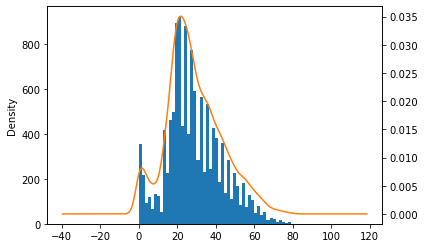

In [41]:
#Plotting Age data to see check changes

ax = df['Age'].plot(kind='hist', bins=50)
df['Age'].plot(kind='kde', ax=ax, secondary_y=True)

In [42]:
#Replacing null values from age features with random values from the same feature
df['Orig_Age'] = df['Age']
print('Total null values before replace: ', df['Age'].isnull().sum())

df['Age'] = np.where(df['Age'].isnull(), 
                     df['Age'].dropna().sample(len(df['Age']), replace=True), 
                     df['Age'])

print('Total null values after replacement: ', df['Age'].isnull().sum())

Total null values before replace:  270
Total null values after replacement:  0


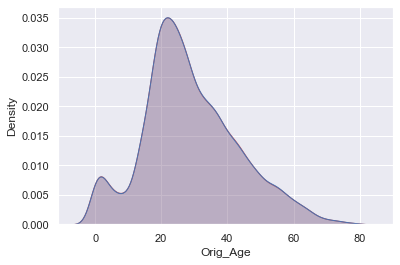

In [43]:
#Checking distribution plot again to make sure 

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['Orig_Age'], shade=True, color="r")
fig = sns.kdeplot(df['Age'], shade=True, color="b")
plt.show()

In [44]:
#dropping original age column
df.drop(['Orig_Age'], axis=1, inplace=True)

In [45]:
#Looking at missing values
df.isnull().sum()

HomePlanet         0
CryoSleep        310
Destination        0
Age                0
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
ID_Group           0
Num_In_Group       0
Ship_Deck          0
Cabin_Num          0
Ship_Side          0
dtype: int64

In [46]:
#Checking the assumption if the passenger is in suspended animation they don't spend money
df_awake = df[df['CryoSleep']==True]
df_awake[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

The remaining missing values come from spending features and Cryo sleep passengers. Since spending sum is $0.0 for each location, assuming if the passenger is in cryo sleep they do not spend any money. This means these two features are correlated and will be worked on together. These features together can fill some of each others missing values.

In [47]:
#If cryosleep is true then the passenger spend $0 at all 5 locations
#spending features
money_feat = [feat for feat in df.columns if (df[feat].dtype != 'O' and df[feat].isnull().sum() != 0)]
print(money_feat)

for feat in money_feat:
    df.loc[(df[feat].isnull()) & (df['CryoSleep']==True), feat] = 0

df[money_feat].isnull().sum()

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


RoomService     170
FoodCourt       180
ShoppingMall    175
Spa             177
VRDeck          177
dtype: int64

In [48]:
#similar to age the remaining values will be filled in with random values from the same column

for feat in money_feat:
    df[feat] = np.where(df[feat].isnull(), 
                         df[feat].dropna().sample(len(df[feat]), replace=True), 
                         df[feat])

df[money_feat].isnull().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [49]:
#creating a column with total value spend from all the spending features
df['Total_Spent'] = df[money_feat].sum(axis=1)

In [50]:
#Looking at the Cryosleep balance
print(df['CryoSleep'].value_counts())
print('Is data type string: ', isinstance(df['CryoSleep'], str))

False    8079
True     4581
Name: CryoSleep, dtype: int64
Is data type string:  False


In [51]:
#Using the Total_Spent to set the CryoSleep as False if money was spent
df.loc[((df['CryoSleep'].isna()) & (df['Total_Spent']!=0)),'CryoSleep'] = False
print('remaining missing values after filling in relation to spending: ', df['CryoSleep'].isnull().sum())

#since the cryo sleep is heavely leaning towards False.
#setting the remaining missing null values to False.
#data type is boolean
df['CryoSleep'].fillna(False, inplace=True)

remaining missing values after filling in relation to spending:  130


In [52]:
#Making sure I have no more missing valuse other than the output Transported (test data)
df.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
ID_Group           0
Num_In_Group       0
Ship_Deck          0
Cabin_Num          0
Ship_Side          0
Total_Spent        0
dtype: int64

### Feature Engineering
Completed: Combine Test and Train Data, Missing Data, Formating Data

- Treating Outliers
- Scaling/Transformation
- Encoding methods
- Handel Imbalance Data set
- Split Test and Train Data -> Export both to csv file for Feature Selection Process

In [53]:
#Treating Outliers for numeric data

num_feat = [feat for feat in df.columns if df[feat].dtype != 'O' and df[feat].dtype != 'bool']

#Removing Number in group becuase that is categorical (Ordinal)
num_feat.remove('Num_In_Group')

print(num_feat)
print('Total numeric features: ', len(num_feat))

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'ID_Group', 'Cabin_Num', 'Total_Spent']
Total numeric features:  9


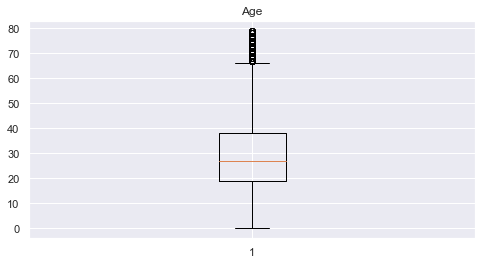

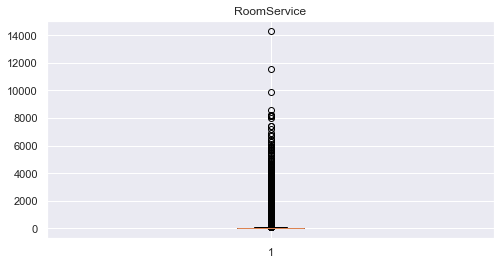

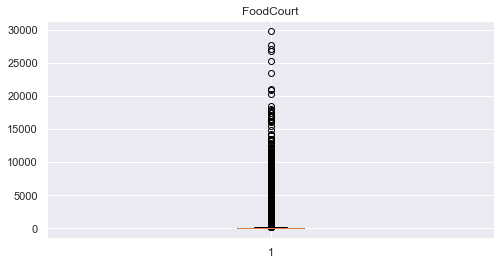

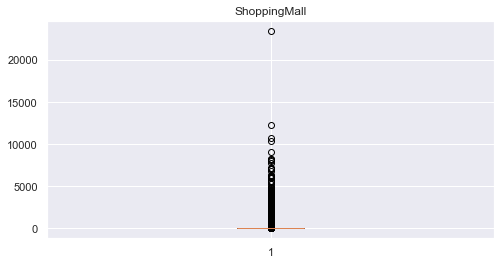

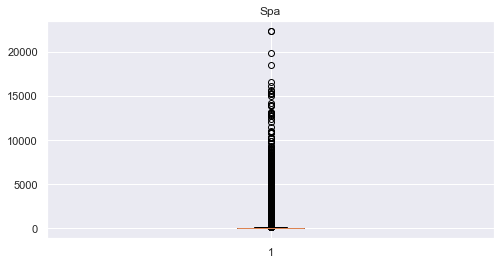

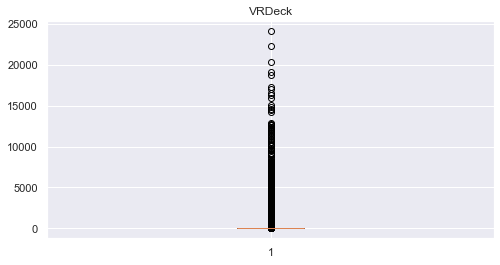

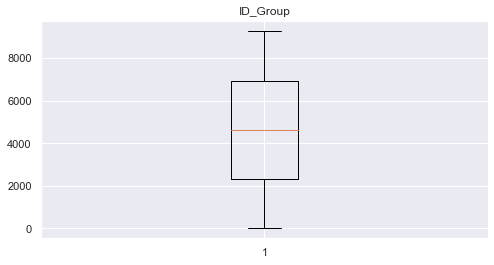

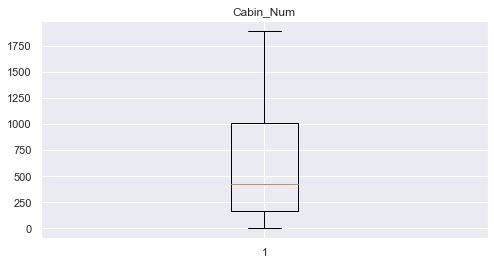

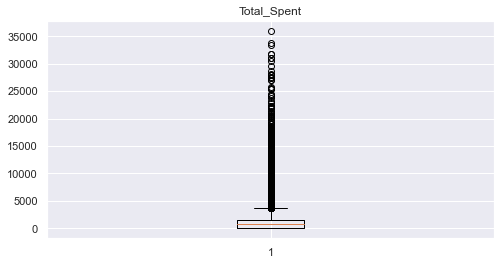

In [54]:
#Box plot to look at what numeric features have outliers

for feat in num_feat:
    plt.figure(figsize=(8,4))
    plt.boxplot(df[feat])
    plt.title(feat)
    plt.show()

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


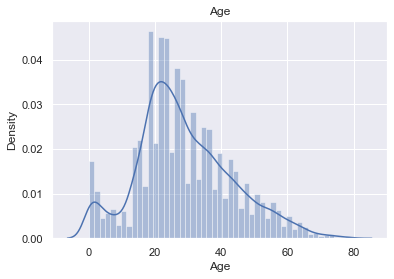

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


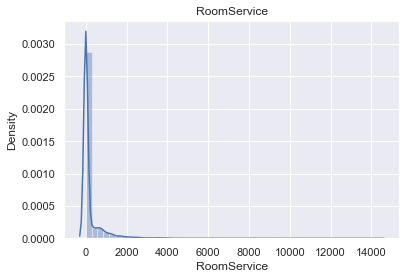

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


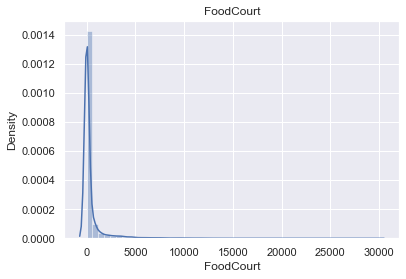

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


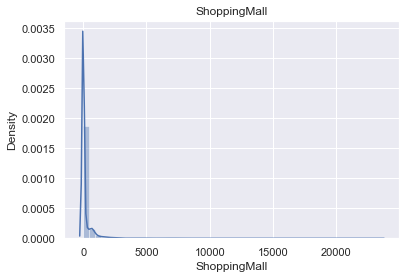

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


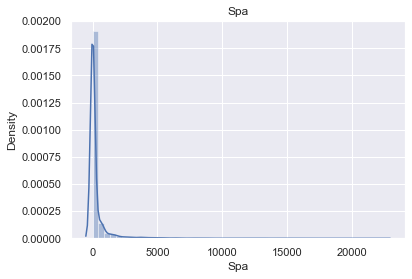

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


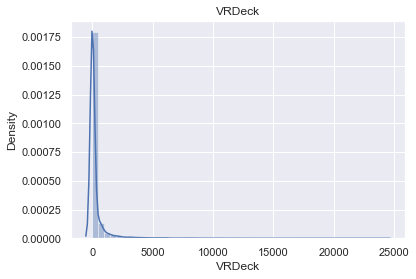

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


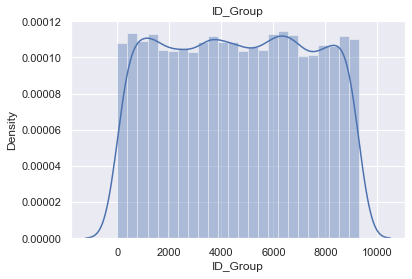

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


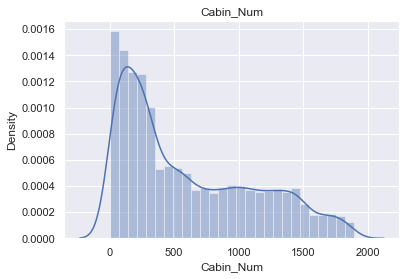

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


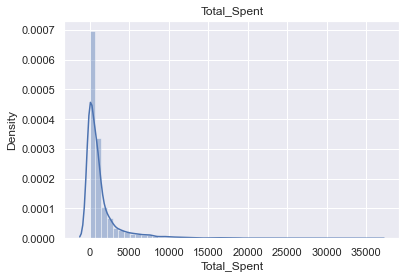

In [55]:
#Looking at the distribution of each numeric feature

for feat in num_feat:
    sns.distplot(df[feat])
    plt.title(feat)
    plt.show()

In [56]:
#Based of both the box plot and the distribution plot removing the ID_Group.
num_feat.remove('ID_Group')
num_feat.remove('Cabin_Num')

no outliers: ID_Group, Cabin_Num

Close to Gaussian Distribution and minimal outliers: Age

Either Righ or Left skewed and extrem outliers: RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Total_Spent

#### Handeling outliers
- Remove Outliers
    - This method works with very large data sets
- Outliers when the data is Normal/Gaussian Distributed
    - Upper and Lower Boundary
    - Upper and Lower Bridge
    - Typically replace outliers with Upper and Lower Boundary
- Outliers when the data is NOT Normal/Gaussian Distributed
    - Upper and Lower Boundary
    - Extreme Upper and Lower Bridge
    - Typically replace outliers with Extreme Upper and Lower Bridge

In [57]:
#Looking at the features with normal distribution
#Assuming Ag follows a Gaussian distribution

#Calculating the Lower and Upper Boundaries
upper_bound_age = df['Age'].mean() + (3*df['Age'].std())
print('upper bound: ', upper_bound_age)
lower_bound_age = df['Age'].mean() - (3*df['Age'].std())
print('lower bound: ', lower_bound_age)
#can't have age less than zero so lower boundary has less of an impact

upper bound:  71.96918533757986
lower bound:  -14.389540002190493


In [58]:
#IRQ (interquantile range) boundaries (75% and 25%)
iqr_age = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print('IRQ: ', iqr_age)
upper_bridge_age = df['Age'].quantile(0.75) + (iqr_age*1.5)
print('upper bridge: ', upper_bridge_age)
lower_bridge_age = df['Age'].quantile(0.25) - (iqr_age*1.5)
print('lower bridge: ', lower_bridge_age)
#can't have age less than zero so lower bridge has less of an impact

IRQ:  19.0
upper bridge:  66.5
lower bridge:  -9.5


/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


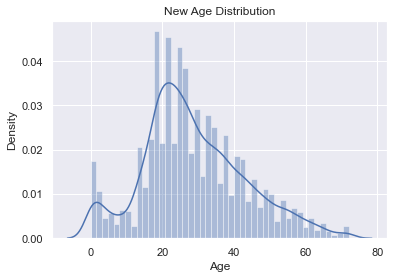

In [59]:
#Using the upper and lower boundary value
#this covers a 99.7% of all data observered for age

df.loc[df['Age']>=upper_bound_age,'Age'] = upper_bound_age
df.loc[df['Age']<=lower_bound_age,'Age'] = lower_bound_age

sns.distplot(df['Age'])
plt.title('New Age Distribution')
plt.show()
#Can now see a small increased value at upper_bound

In [60]:
#Finished with age so dropping from numeric feature list
num_feat.remove('Age')

In [61]:
#Calculating for skewed distribution and extrem outlier features
#upper and lower boundaries and extreme upper and lower bridge

for feat in num_feat:
    print(feat)
    #Calculating the Lower and Upper Boundaries
    upper_bound = df[feat].mean() + (3*df[feat].std())
    print('upper bound: ', upper_bound)
    lower_bound = df[feat].mean() - (3*df[feat].std())
    print('lower bound: ', lower_bound)
    
    #IRQ (interquantile range) boundaries (75% and 25%)
    iqr= df[feat].quantile(0.75) - df[feat].quantile(0.25)
    print('IRQ: ', iqr)
    # Extreme upper and lower bridge
    ext_upper_bridge = df[feat].quantile(0.75) + (iqr*3)
    print('Extreme upper bridge: ', ext_upper_bridge)
    ext_lower_bridge = df[feat].quantile(0.25) - (iqr*3)
    print('Extreme lower bridge: ', ext_lower_bridge)
    
    df.loc[df[feat]>=ext_upper_bridge,feat] = ext_upper_bridge
    df.loc[df[feat]<=ext_lower_bridge,feat] = ext_lower_bridge
    print(df[feat].max())
    print('\n')
    
    

RoomService
upper bound:  2163.6534496353543
lower bound:  -1720.476734138053
IRQ:  46.0
Extreme upper bridge:  184.0
Extreme lower bridge:  -138.0
184.0


FoodCourt
upper bound:  5169.389508458017
lower bound:  -4274.3000712953335
IRQ:  71.0
Extreme upper bridge:  284.0
Extreme lower bridge:  -213.0
284.0


ShoppingMall
upper bound:  1929.8475594385645
lower bound:  -1584.0537275187494
IRQ:  26.0
Extreme upper bridge:  104.0
Extreme lower bridge:  -78.0
104.0


Spa
upper bound:  3724.469814451797
lower bound:  -3109.6708938658294
IRQ:  55.0
Extreme upper bridge:  220.0
Extreme lower bridge:  -165.0
220.0


VRDeck
upper bound:  3839.0480066346154
lower bound:  -3229.28547772174
IRQ:  40.0
Extreme upper bridge:  160.0
Extreme lower bridge:  -120.0
160.0


Total_Spent
upper bound:  9944.683890162325
lower bound:  -7036.062456083682
IRQ:  1468.75
Extreme upper bridge:  5875.0
Extreme lower bridge:  -4406.25
5875.0




In [62]:
#The spending can't be negative for this so the lower extreme bridge will not do anything
#Replacing the outliers in each feature with the extreme upper and lower bridge

for feat in num_feat:
    print(feat)
    #Recalculating
    #IRQ (interquantile range) boundaries (75% and 25%)
    iqr= df[feat].quantile(0.75) - df[feat].quantile(0.25)
    print('IRQ: ', iqr)
    # Extreme upper and lower bridge
    ext_upper_bridge = df[feat].quantile(0.75) + (iqr*3)
    print('Extreme upper bridge: ', ext_upper_bridge)
    ext_lower_bridge = df[feat].quantile(0.25) - (iqr*3)
    print('Extreme lower bridge: ', ext_lower_bridge)
    
    df.loc[df[feat]>=ext_upper_bridge,feat] = ext_upper_bridge
    df.loc[df[feat]<=ext_lower_bridge,feat] = ext_lower_bridge
    print(df[feat].max())
    #print('\n')

RoomService
IRQ:  46.0
Extreme upper bridge:  184.0
Extreme lower bridge:  -138.0
184.0
FoodCourt
IRQ:  71.0
Extreme upper bridge:  284.0
Extreme lower bridge:  -213.0
284.0
ShoppingMall
IRQ:  26.0
Extreme upper bridge:  104.0
Extreme lower bridge:  -78.0
104.0
Spa
IRQ:  55.0
Extreme upper bridge:  220.0
Extreme lower bridge:  -165.0
220.0
VRDeck
IRQ:  40.0
Extreme upper bridge:  160.0
Extreme lower bridge:  -120.0
160.0
Total_Spent
IRQ:  1468.75
Extreme upper bridge:  5875.0
Extreme lower bridge:  -4406.25
5875.0


/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


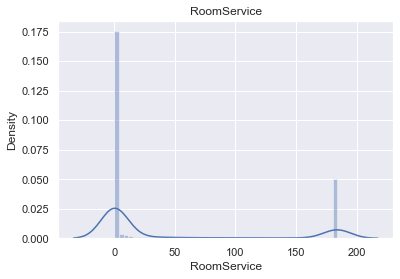

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


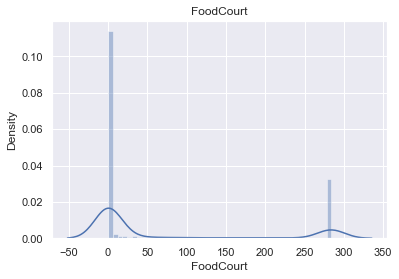

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


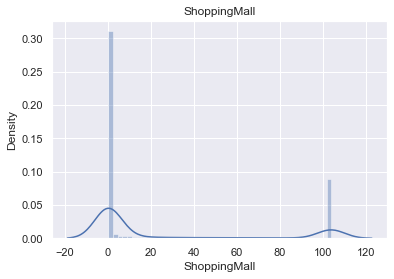

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


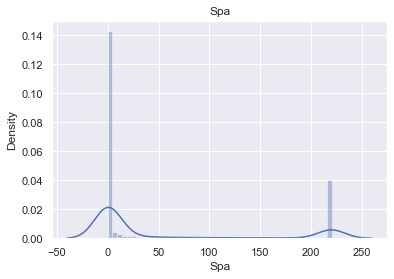

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


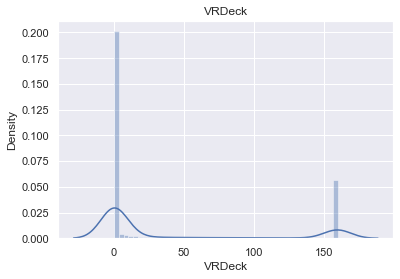

/Users/lynnpowell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


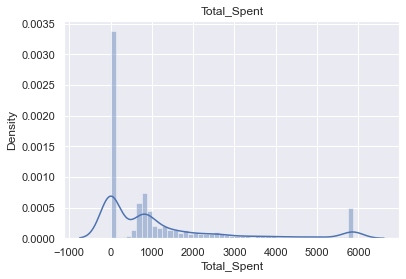

In [63]:
#Looking at the distribution of each numeric feature

for feat in num_feat:
    sns.distplot(df[feat])
    plt.title(feat)
    plt.show()

For all distribution plots, can now see an increase in the numb of value at upper_bound

### Feature Engineering
Completed: Combine Test and Train Data, Missing Data, Formating Data, Treating Outliers

- Scaling/Transformation
- Encoding methods
- Handel Imbalance Data set
- Split Test and Train Data -> Export both to csv file for Feature Selection Process

Finishing up numeric features with Scaling / Transformation

** Perform Transformation on features that are not normal distribution then scaling **

#### Scaling / Tranformation Methods:
- Normalization and Standardization
    - Mean is 0 and standard deviation is 1
    - assumes distribution is normal (will work well with Age feature)
    - to work with other features need to tranform in to normal distribution then use this scale
    - Does not work well with large outliers
- Scaling to Minimum and Maximum Values -> Suggested as most popular
    - Scales the value between 0 and 1 (default)
    - can change the range to work better with the data set
    - Does not work well with large outliers
- Max Abs Scaler
    - divides each value by the max value in the column
    - leaving the final values between really close to 0 and 1
    - Does not work well with large outliers
- Scaling to Medium and Quantile Values (Robust Scaler)
    - Scales the data by the IQR (inter-Quartile Range)
    - Robust to outliers
- Quantile Tranformer Scaler
    - converts teh variable distribution to a normal distribution and scales it accordingly
    - also works with outliers
    - Best to use with non-linear data
- Gaussian Transformation - Only use if the distribution is not guassian/normal
    - Logarithmic Transformation
        - can't use with negative numbers or columns with the value 0
    - Reciprocal Transformation
    - Square Root Transformation
    - Exponential Transformation
    - Box Cox Tranformation
        - only positive values
    - The Yeo-Johnson Transform
        - negative and positive values
    - Power Transformer


In [64]:
#Finishing numeric features with Scaling/Transformation
num_feat = [feat for feat in df.columns if df[feat].dtype != 'O' and df[feat].dtype!='bool']

#Removing Number in group becuase that is categorical (Ordinal)
num_feat.remove('Num_In_Group')

print(num_feat)
print('Total numeric features: ', len(num_feat))

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'ID_Group', 'Cabin_Num', 'Total_Spent']
Total numeric features:  9


In [65]:
#Checking to see what features are Gaussian distributed
#Ploting with Q-Q plot

def plot_data(feature):
    plt.figure(figsize=(10,6))
    #Left plot distribution plot
    plt.subplot(1,2,1)
    #sns.distplot(df[feat])
    feature.hist()
    
    #Right plot - Q-Q plot
    plt.subplot(1,2,2)
    stat.probplot(feature,dist='norm',plot=pylab)
    plt.show()

Age


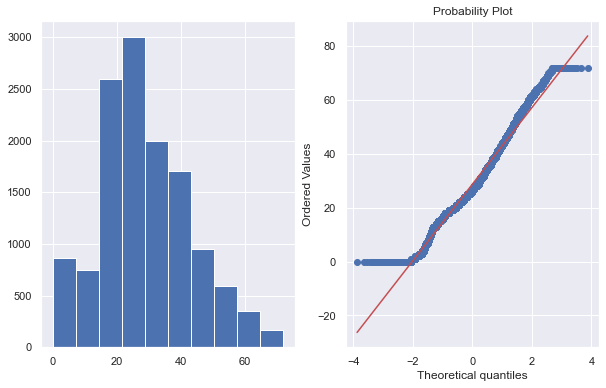

RoomService


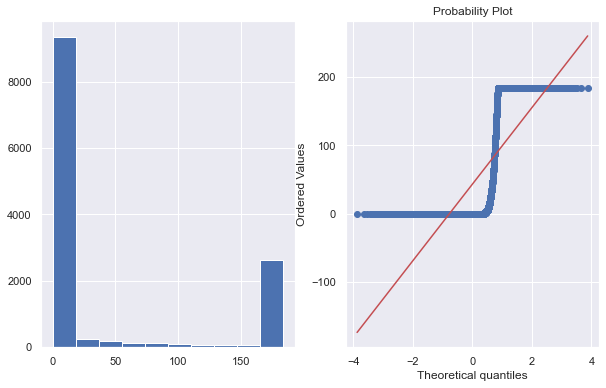

FoodCourt


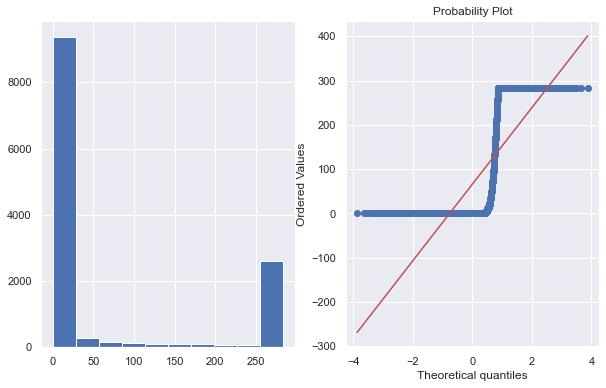

ShoppingMall


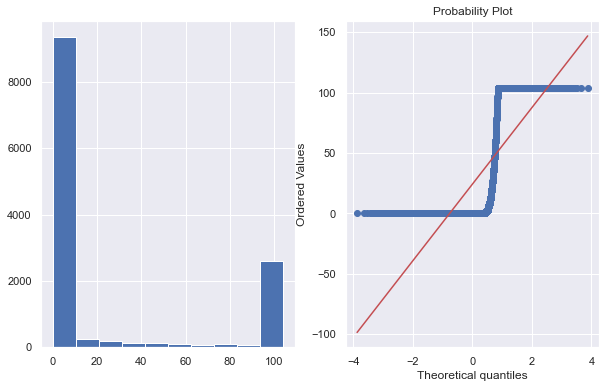

Spa


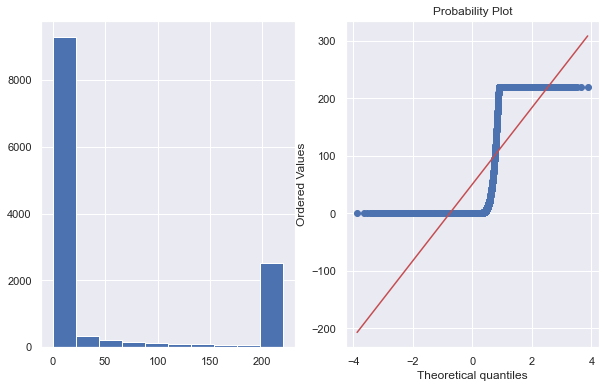

VRDeck


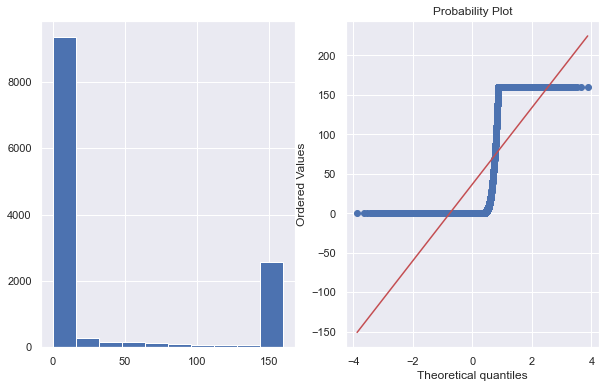

ID_Group


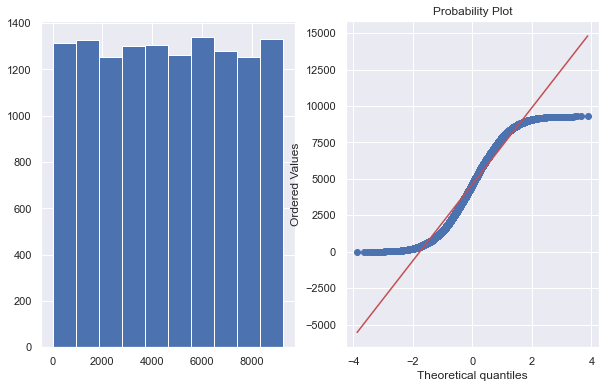

Cabin_Num


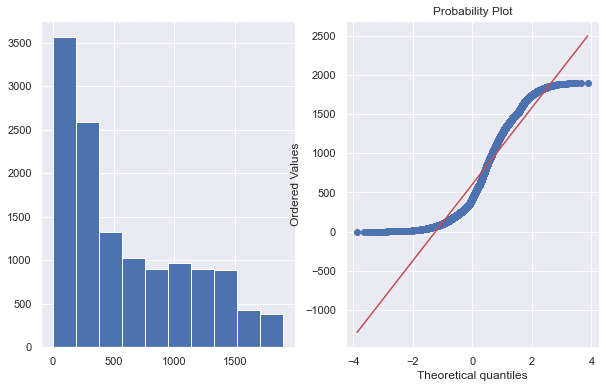

Total_Spent


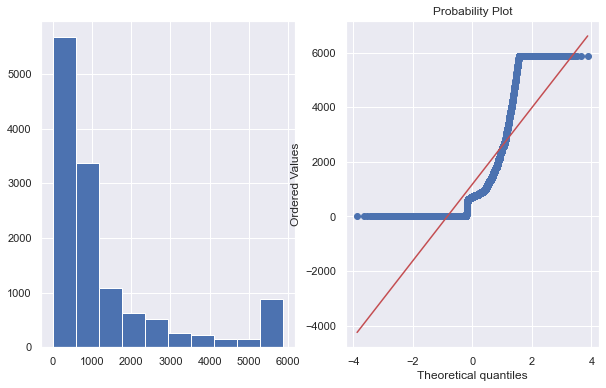

In [66]:
#Looking to see how the data plots before transformation

for feat in num_feat:
    print(feat)
    plot_data(df[feat])

Age


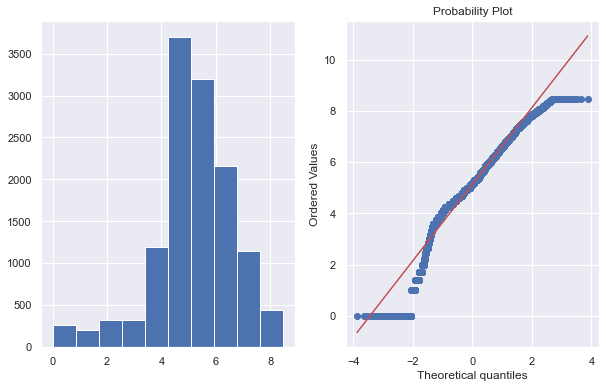

RoomService


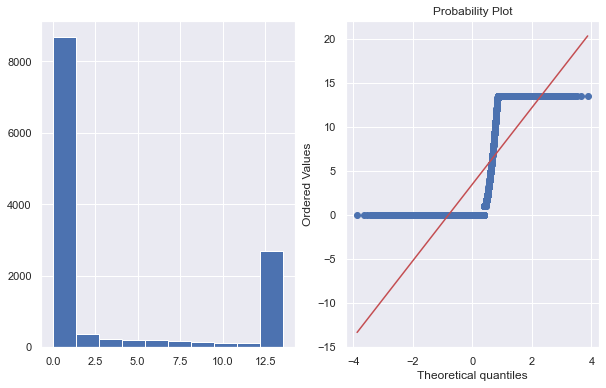

FoodCourt


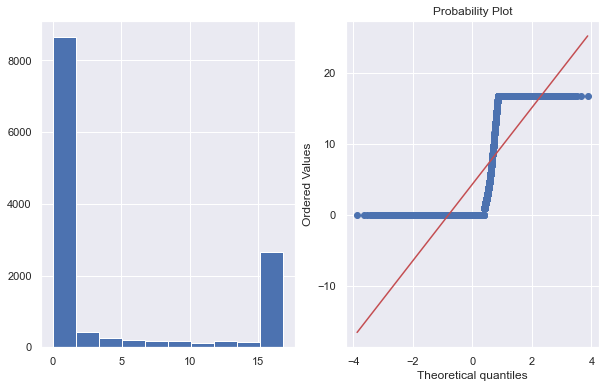

ShoppingMall


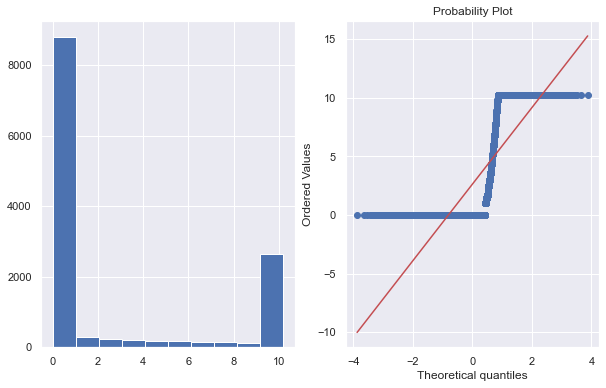

Spa


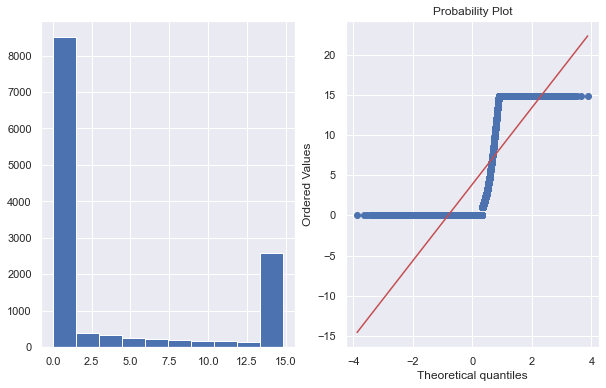

VRDeck


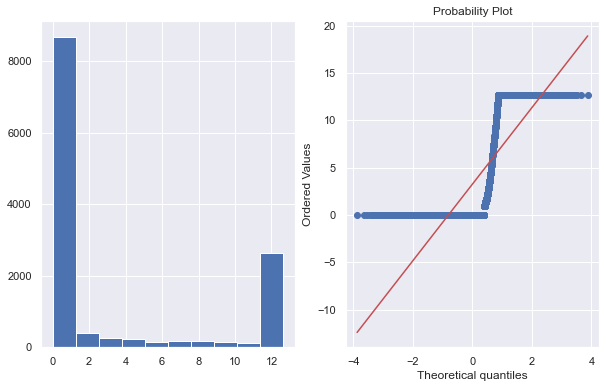

ID_Group


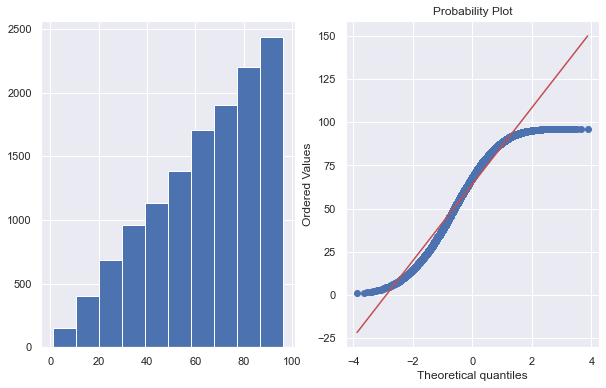

Cabin_Num


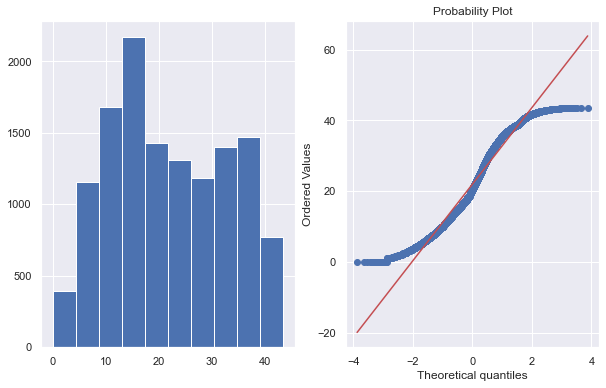

Total_Spent


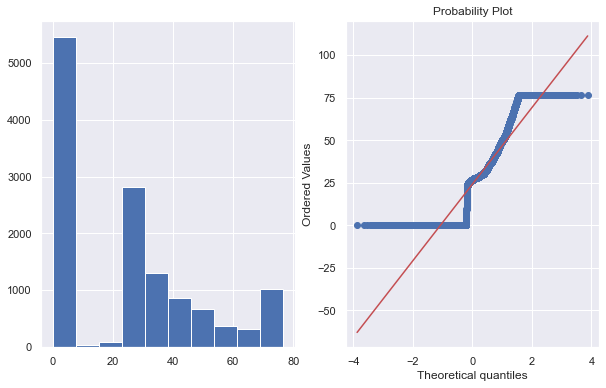

In [67]:
#skiping log transformation, reciprocal features
#since each feature has a value of 0 and wont work

#square root transformation
trans_df = df.copy()
for feat in num_feat:
    print(feat)
    plot_data(trans_df[feat]**(1/2))

Age


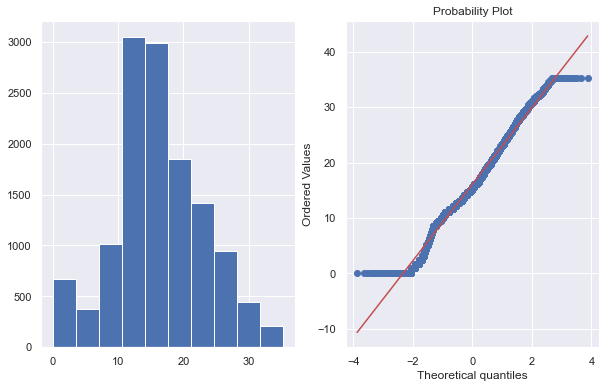

RoomService


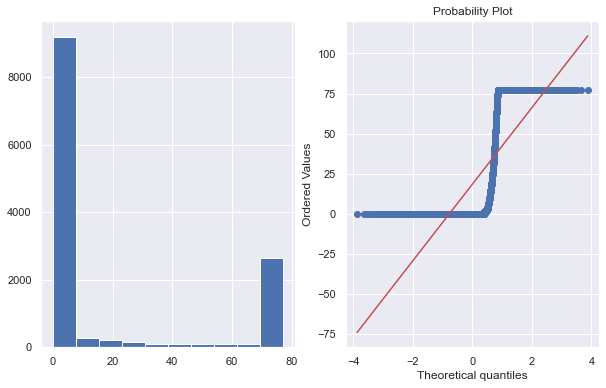

FoodCourt


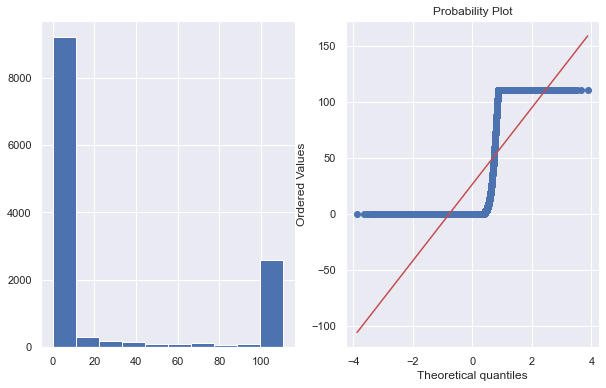

ShoppingMall


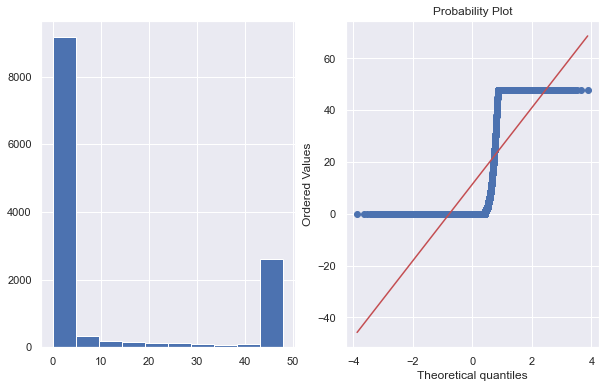

Spa


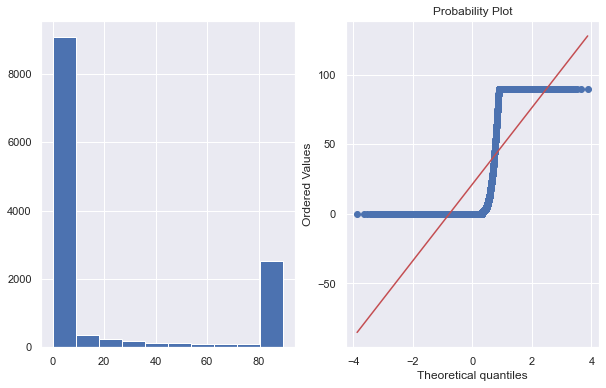

VRDeck


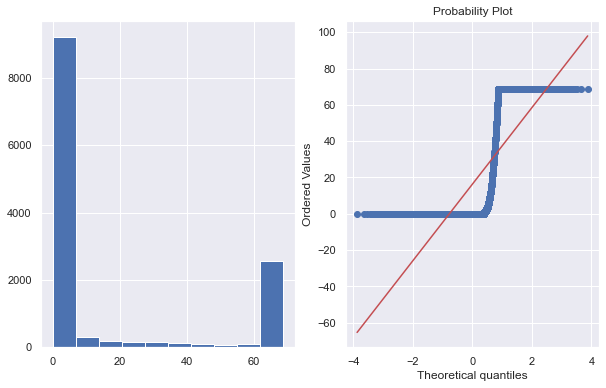

ID_Group


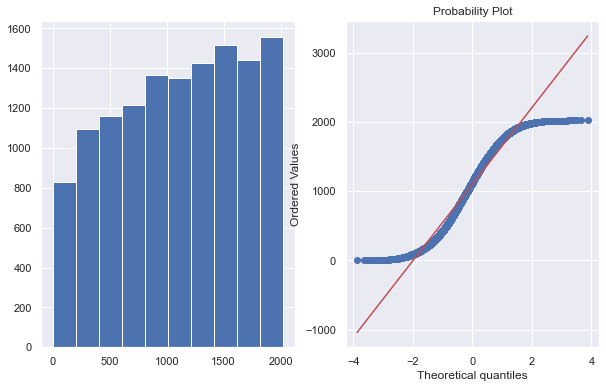

Cabin_Num


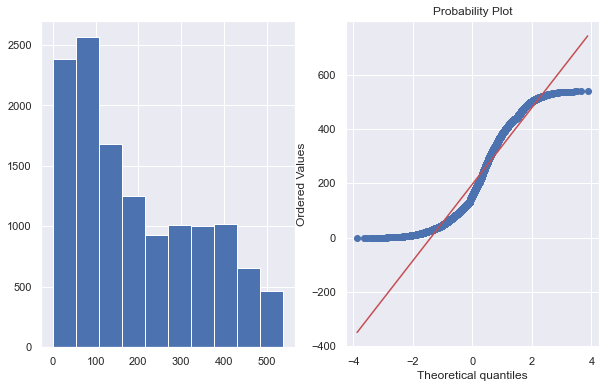

Total_Spent


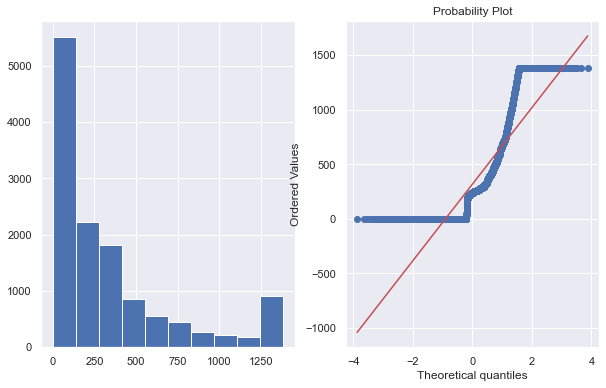

In [68]:
#exponential transformation
trans_df = df.copy()
for feat in num_feat:
    print(feat)
    plot_data(trans_df[feat]**(1/1.2))

Age


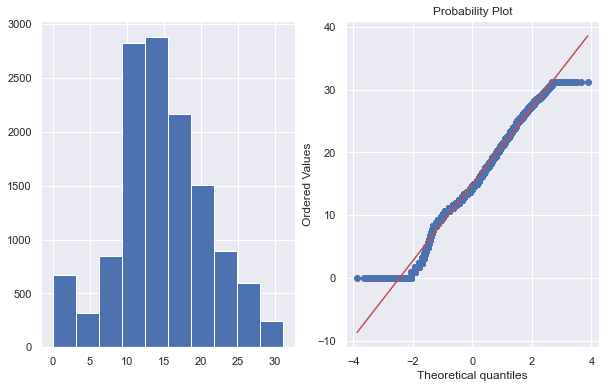

RoomService


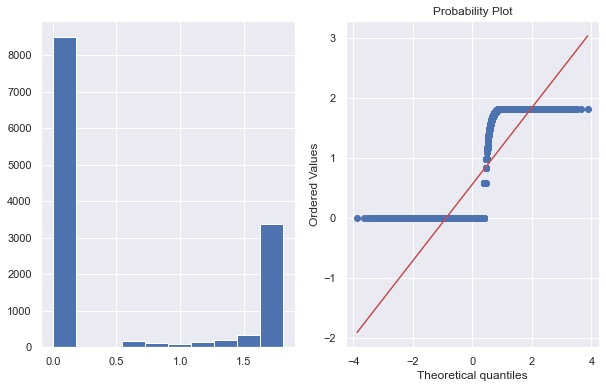

FoodCourt


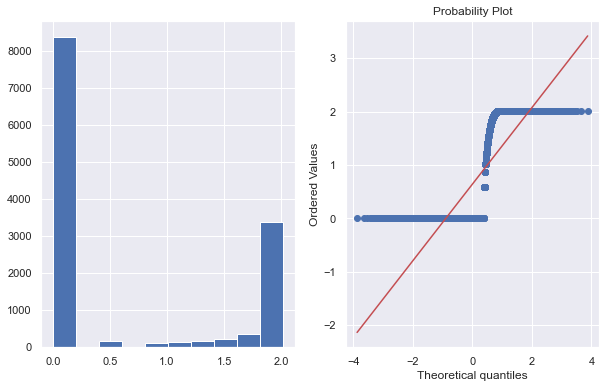

ShoppingMall


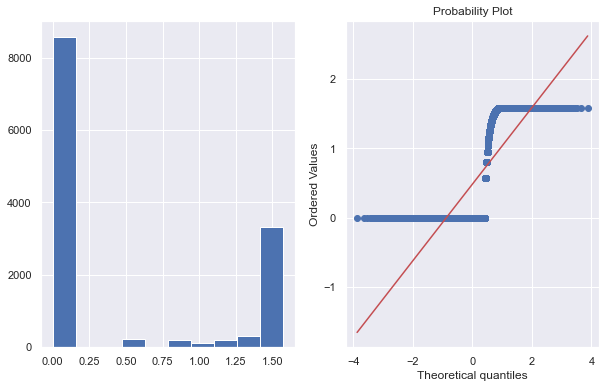

Spa


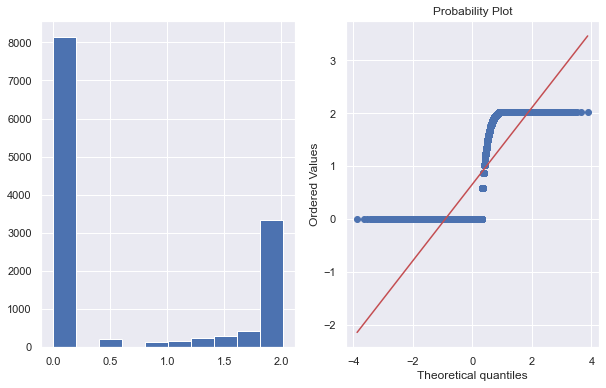

VRDeck


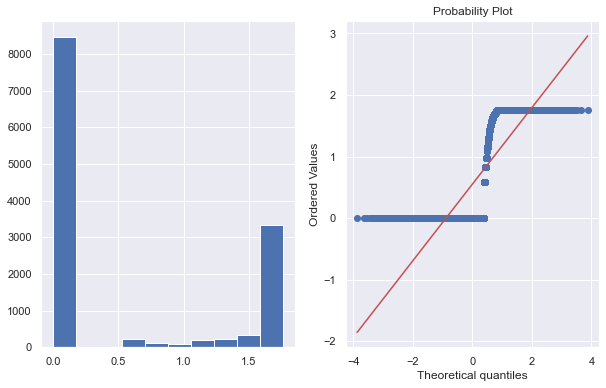

ID_Group


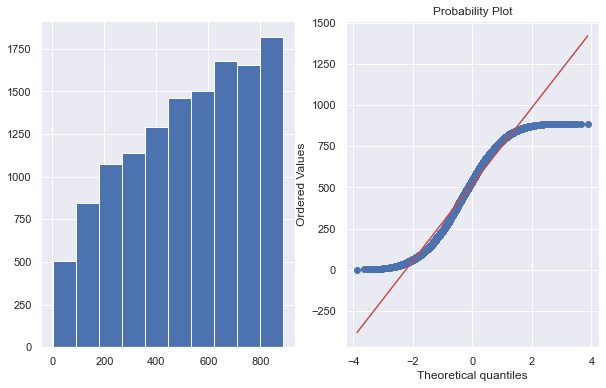

Cabin_Num


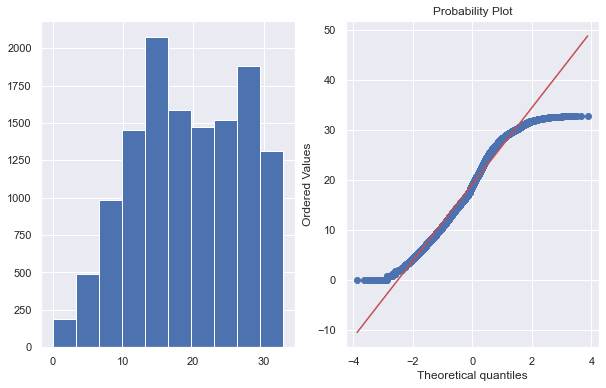

Total_Spent


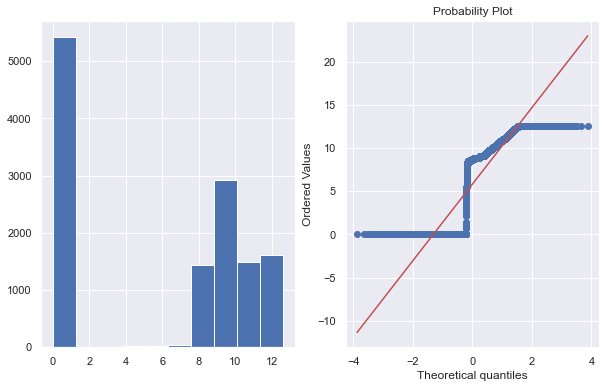

In [78]:
#Yeo Johnson transformation
trans_df = df.copy()

for feat in num_feat:
    print(feat)
    #print(trans_df[feat].min())
    trans_df[feat],lmbda = stat.yeojohnson(trans_df[feat])
    #print(trans_df[feat].min())
    plot_data(trans_df[feat])
    

In [90]:
#Power Transformation
pt = PowerTransformer()

trans_df = df.copy()
scale_df[num_feat] = pt.fit_transform(trans_df[num_feat])
print(scale_df)

for feat in num_feat:
    print(feat)
    #plot_data(scale_df[feat])

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1242/2113649487.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  scale_df[num_feat] = pt.fit_transform(trans_df[num_feat])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [96]:
#Quantile Transformation

qt = QuantileTransformer(n_quantiles=10, random_state=0)

trans_df = df.copy()
scale_df[num_feat] = qt.fit_transform(trans_df[num_feat].values)

for feat in num_feat:
    print(feat)
    plot_data(trans_df[feat])

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1242/3373519826.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  scale_df[num_feat] = qt.fit_transform(trans_df[num_feat].values)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [94]:
#Not sure if any of the transformation techniques were working
#Trying to scale the data first then use transformation
#Looking just at age data to try and figure out transformation and scaling methods

trans_df = df.copy()

print(trans_df[num_feat].values)
#Max Abs Scalar
trans_df[num_feat] = MaxAbsScaler().transform(trans_df[num_feat].values.values)
#print(scale_df['Age'])


[[3.900e+01 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.400e+01 1.090e+02 9.000e+00 ... 2.000e+00 0.000e+00 7.360e+02]
 [5.800e+01 4.300e+01 2.840e+02 ... 3.000e+00 0.000e+00 5.875e+03]
 ...
 [3.000e+01 0.000e+00 0.000e+00 ... 9.271e+03 2.960e+02 0.000e+00]
 [5.500e+01 0.000e+00 2.840e+02 ... 9.273e+03 2.970e+02 3.203e+03]
 [4.300e+01 0.000e+00 0.000e+00 ... 9.277e+03 1.498e+03 0.000e+00]]


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
#Looking just at age data to try and figure out transformation and scaling methods
